In [1]:
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from IPython.display import display

In [2]:
iris = load_iris()
X = iris.data[:,::2]  # comprimento das sépalas e pétalas, indices 0 e 2
Y = iris.target
print('X.shape:',X.shape)
print('Y.shape:',Y.shape)

X.shape: (150, 2)
Y.shape: (150,)


## Visualizando o dataset

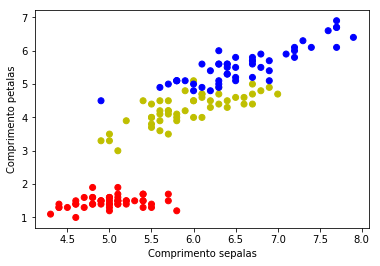

In [4]:
colors = np.array(['r','y','b'])
plt.scatter(X[:, 0], X[:, 1], c=colors[Y])
plt.xlabel('Comprimento sepalas')
plt.ylabel('Comprimento petalas')
plt.show()

In [5]:
# normalização correta - por coluna
X_c = X - X.min(axis=0,keepdims=True)
X_c /= X_c.max(axis=0,keepdims=True)

In [7]:
def oneHotIt2(Y,n_classes):
    Y = Y.reshape(-1,1)
    i = np.arange(n_classes).reshape(1,n_classes)
    Y_oh = (Y == i).astype(int)
    return Y_oh

def oneHotIt(Y,n_classes):
    n_samples = Y.size # número de amostras
    i = np.arange(n_samples)
    Y_oh = np.zeros(shape=(n_samples,n_classes))
    Y_oh[i,Y] = 1
    return Y_oh

### Gerando vetor de rótulos no formato one-hot 

In [8]:
Y_oh = oneHotIt(Y,3)
# Mostrando os primeiros 5 destes valores
print('Y[:5]:\n', Y[:5])
print('Y_oh[:5]=\n',Y_oh[:5])
print('Y[-5:]:\n', Y[-5:])
print('Y_oh[-5:]=\n',Y_oh[-5:])

Y[:5]:
 [0 0 0 0 0]
Y_oh[:5]=
 [[ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]]
Y[-5:]:
 [2 2 2 2 2]
Y_oh[-5:]=
 [[ 0.  0.  1.]
 [ 0.  0.  1.]
 [ 0.  0.  1.]
 [ 0.  0.  1.]
 [ 0.  0.  1.]]


## Colocando a coluna 0 em X com 1s como o 'bias'

In [9]:
X_bias = np.hstack([np.ones((150,1)),X_c]) # incluído X com coluna de 1s para gerar bias no W
print('X_bias[:5]=\n',X_bias[:5])

X_bias[:5]=
 [[ 1.          0.22222222  0.06779661]
 [ 1.          0.16666667  0.06779661]
 [ 1.          0.11111111  0.05084746]
 [ 1.          0.08333333  0.08474576]
 [ 1.          0.19444444  0.06779661]]


In [10]:
def softmax(Z):
    # computes softmax for all samples, normalize among classes (columns)
    # input Z: scores; shape: samples rows x classes columns
    # output S: same shape of input
    EZ = np.exp(Z)
    S = EZ / EZ.sum(axis=1,keepdims=True) # normaliza nas classes - colunas
    return S

## Este é o laço principal da Regressão Logística por Softmax

In [21]:
n_samples = X_bias.shape[0] # number of training examples
n_features = X_bias.shape[1] # number of attributes (features + 1(bias))
n_classes = 3          # number of classes
WT = np.zeros((n_features,n_classes)) # n. de linhas é igual a número de atributos (features, pixels)
iterations = 10000
learningRate = 0.15

losses = []
for i in range(iterations):
    scores = X_bias.dot(WT)
    Y_hat_oh = softmax(scores)
    loss = (-1. / n_samples) * np.sum(Y_oh * np.log(Y_hat_oh))
    Grad = (-1. / n_samples) * (X_bias.T).dot(Y_oh - Y_hat_oh) 
    WT = WT - (learningRate * Grad)
    losses.append(loss)
print('final W:\n',WT)
print('Final loss:',loss)

final W:
 [[  7.00966877   1.62753812  -8.63720689]
 [ -3.02197327   1.76353      1.25844327]
 [-14.71228144  -0.67161669  15.38389814]]
Final loss: 0.206986527354


## Visualizando a minimização da Perda durante o treinamento

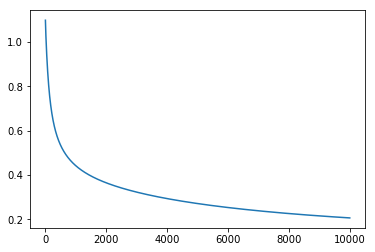

In [22]:
plt.plot(losses)

## Função `predict`

In [23]:
def predict(X,WT):
    Y_hat_oh = softmax(X.dot(WT))
    # escolhe a maior probabilidade entre as classes
    Y_hat = np.argmax(Y_hat_oh, axis=1)
    return Y_hat

In [24]:
Y_hat = predict(X_bias,WT)

accuracy = np.sum(Y_hat == Y)/np.float(n_samples)

print('Acurácia: ', accuracy)

Acurácia:  0.96


## Matriz de confusão

In [25]:
import pandas as pd
pd.crosstab(Y_hat, Y)

col_0,0,1,2
row_0,,,
0,50,0,0
1,0,47,3
2,0,3,47


## Visualizando as regiões do classificador no espaço de atributos

Como são apenas 2 atributos, largura e comprimento das sépalas, é possível visualizar o espaço de atributos
num gráfico bidimensional e posicionar cada amostra rotulada, assim como rotular cada ponto do espaço de
atributos, podendo visualizar o projeto do classificador. Neste tipo de visualização é possível verificar
o comportamento do classificador e como ele divide o espaço de atributos. O classificador de Regressão Softmax
é um classificador linear e os espaço de atributo é dividido por linhas retas.

A função `FSView` permite esta visualização.

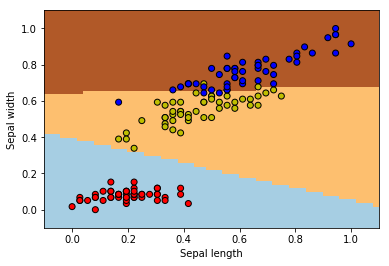

In [26]:
from Jview import FSView
FSView(X_bias,Y,WT)